### Clustering with algoritm Gaussian kernel fuzzy c-means 

This is a implementation with dataset Multiple features in the repository (https://archive.ics.uci.edu/dataset/72/multiple+features)
we apply with tree datasets (mfeat-fac, mfeat-fou, mfeat-kar) for each do it:
  - 50 times, with c=10 for partation fuzzy
  - compute Modified partition coefficient
  - paraments $T = 100, \epsilon=10^{-6}, m = {1.01, 1.1, 1.6}$

  - show the bests with based in fuction cost:
    - prototatipes ${g_{1},..., g_n}$
    - widths ${s_1,..., s_n}$
    - confusion matrix 


base article: Gaussian Kernel Fuzzy C-Means with Width Parameter Computation and Regularization.
PATTERN RECOGNITION, v. 143, p. 109749, 2023, 
doi: https://doi.org/10.1016/j.patcog.2023.109749 

***
Gaussian kernel function
***
$$
  K^{(s_i)}(x_l, x_k) = exp{
    \displaystyle 
    \Bigg \{
      -\frac{1}{2}
      \sum \limits _{j=1}^p 
        \frac{1}{{s^2}_{ij}}
        (x_{lj} - x_{kj})^2
    \Bigg \} 
    }
$$

***
objective  function
***

$$
  J_{KFCM-K-W.2} = 
    \displaystyle 
      \sum \limits _{i=1}^c 
        \sum \limits _{k=1}^n 
          (u_{ki})^m
          (2 - 2{K^{(s_i)}(x_k, g_i)})
$$

  <!-- $
    s.t. u_{ki} \ge 0
  $ and  -->
  $$
    \forall k, 
    \sum \limits _{i=1}^c 
      u_{ki} = 1
  $$

***
width
***

$$
\frac{1}{{s^2}_{ij}} = 
  \frac{
    \Bigg \{
      \prod \limits _{h=1}^p 
        \sum \limits _{k=1}^n 
          {(u_{ki})^m}
          {K^{(s_i)}(x_k, g_i)}
          {(x_{kh} - g_{ih})^2}
    \Bigg \}^
    {
      \frac{1}{p}
    }
  }{
    \sum \limits _{k=1}^n 
      {(u_{ki})^m}
      {K^{(s_i)}(x_k, g_i)}
      {(x_{kj} - g_{ij})^2}
  }
$$


<!-- $$
\frac{1}{{s^2}_{ij}} = 
  \frac{
    \Bigg \{
      \prod \limits _{h=1}^p 
        \Bigg \{
          1 -
          \sum \limits _{k=1}^n 
            {(u_{ki})^m}
            {K^{(s_i)}(x_k, g_i)}
            {(x_{kh} - g_{ih})^2}
        \Bigg \}
    \Bigg \}^
    {
      \frac{1}{p}
    }
  }{
    \Bigg \{
      1 -
      \sum \limits _{k=1}^n 
        {(u_{ki})^m}
        {K^{(s_i)}(x_k, g_i)}
        {(x_{kj} - g_{ij})^2}

    \Bigg \}
  }
$$ -->

$$
  \forall (1 \le i \le c),
    \prod \limits _{h=1}^p 
      \frac{1}{{s^2}_{ij}}
    = 1
$$

***
prototipes
***

$$
g_i = 
  \frac{
    \sum \limits _{k=1}^n 
      {(u_{ki})^m}
      {K^{(s_i)}(x_k, g_i)}
      {x_k}

  }{
    \sum \limits _{k=1}^n 
      {(u_{ki})^m}
      {K^{(s_i)}(x_k, g_i)}
  } 
$$
$$
  \forall (1 \le i \le c)
$$

***
fuzzy matrix
***

$$
  u_{ki} = 
    \Bigg [ 
      \sum \limits _{h=1}^c 
        \Bigg ( 
          \frac{
            2 - 2{K^{(s_i)}(x_k, g_i)}
          }{
            2 - 2{K^{(s_i)}(x_k, g_h)}
          }
        \Bigg )^
        {
          \frac{1}{m-1}
        } 
    \Bigg ] ^{-1}
$$

### Librarys

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

In [78]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [9]:
!pip install xlrd openpyxl

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


### Data transform

In [4]:
class Cleaner(BaseEstimator, TransformerMixin):
  def __init__(self):
    super()
  
  def read_dataset(self, filename):
    X = pd.read_csv(filename)
    y = pd.DataFrame({X.shape[1]: np.arange(0, X.shape[0])//200})
    return X, y
  def fit(self, X, y):
    return self
  
  def transform(self, X: pd.DataFrame, y=pd.DataFrame):
    y_lenth = len(y)
    if y_lenth:
      values = pd.concat([X, y], axis=1)
    else:
      values = X.copy()

    values = values.dropna()
    values = values.drop_duplicates()
    if y_lenth:
      return values[X.columns.values], values[values.columns.values[-1]]
    return values
  
  def fit_transform(self, X, y=pd.DataFrame):
      return self.fit(X, y).transform(X, y)
  
class Transformer(BaseEstimator, TransformerMixin):
  def __init__(self):
    super()
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    if type(X) == np.ndarray:
      return X
    return X.values
  def fit_transform(self, X, y=None):
    return self.fit(X, y).transform(X, y)
  
class LogTransformer(BaseEstimator, TransformerMixin):
  def __init__(self, c=1e-5, l=1):
    super()
    self.c = c
    self.l = l
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    # return np.log(X + self.c)
    return (np.log(X + self.c)**self.l -1) / self.l
  def fit_transform(self, X, y=None):
    return self.fit(X, y).transform(X, y)

### Metrics

In [5]:
class Gaussian:
  def distance(self, g, x, sigma):
    if x.shape[0] == 0 or sigma.shape[0] == 0:
      raise Exception
    distance = (x - g)**2
    distance_sigma = distance / sigma
    summatory_distance = (-1/2)*np.sum(distance_sigma, 1)
    return np.exp(summatory_distance)

class Metrics:
  def mpc(u: np.array):
    # modified partition coefficient
    n, k = u.shape
    f = np.trace(u.dot(u.T)) / n

    mpc = 1 - (k/(k - 1))*(1 - f)
    return mpc
  def ars(y_true, y_pred):
    # adjusted rand score
    return adjusted_rand_score(y_true, y_pred)

### Model

In [6]:
# tá funcionando bonitinho
class Shower():
  def show_grafico(self, x):
    _, axes = plt.subplots()
    markers = ['^','x','+']
    p = self.predict(self.G, x)
    
    for (c, (x_1, x_2)) in zip(p, x):
      r, g, b, a = .9*((c+1)/self.num_class), .9*((c*1.1)/self.num_class), .9*((c*1.2)/self.num_class), 0.1
      
      axes.plot(x_1, x_2, "ro", marker=markers[c])
        
    raio = self.distance_classes() / 2
    
    for i, (x_1, x_2) in enumerate(self.G):
        
        plt.plot(x_1, x_2, "go", scalex=0.01,scaley=0.01)
        r, g, b, a = .9*((i+1)/self.num_class), .9*((i*1.1)/self.num_class), .9*((i*1.2)/self.num_class), 0.9
        c = plt.Circle((x_1, x_2), raio, color=(r, g, b, a), fill=False)

        axes.set_aspect(aspect = 1, adjustable = "datalim", anchor="SW")
        axes.add_artist(c)
    plt.show()

  def show_function_objetive(self, data_f, params):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))
    
    axs[0].boxplot(data_f)
    axs[0].yaxis.grid(True)
    axs[0].set_xticks([y + 1 for y in range(len(data_f))],
                  labels=params)
    axs[0].set_xlabel('m')
    axs[0].set_ylabel("f")

    plt.show()

  def show_labels(self, x, filename):
    # Data
    k, n = x.shape
    plt.figure(figsize=(20, 6))
      
    # Labels  
    xlabs = np.arange(k)
    ylabs = np.arange(n)
            
    # Heat map
    _, ax = plt.subplots(constrained_layout=True)
    
    # ax.figure()
    ax.set_axis_off() 
    ax.imshow(x)
    if n < 10:
      # Add the labels
      ax.set_xticks(ylabs)
      ax.set_yticks(xlabs)

      # Add the values to each cell
      for i in range(len(xlabs)):
          for j in range(len(ylabs)):
              _ = ax.text(j, i , round(x[i, j], 1),
                            ha = "center", va = "center", color = (0,0,0)) # "w"
    if filename:
      plt.savefig(filename, dpi=150)
    plt.show()
  
  def show_G_S(self, folder):
    # show the values of Gs and S(widths)
    if not os.path.isdir(folder):
      os.makedirs(folder) 
    print("Gs")
    self.show_labels(self.G, f"{folder}/G")
    print("S2s")
    self.show_labels(self.sigma, f"{folder}/sigma")

class Model():
  def __init__(self, loss = Gaussian(), var_type=np.double) -> None:
    # model base
    self.loss = loss
    self.var_type = var_type
    
  def predict(self, X, is_preprocessing=False, argmax=True):
    # here we make predict in x
    n = X.shape[0] 
    k = self.G.shape[0]

    if is_preprocessing:
      X = self.preprocesssing(X)
    u = np.zeros((n, k), self.var_type)

    distances = np.array([2 - 2*self.loss.distance(self.G[i], X, self.sigma[i]) for i in range(k)]).T

    expoente = 1/(self.m - 1)

    for i in range(n):
      
      ds = distances[i]==0
      if (ds).any():
        summation_c_i_1 = np.zeros((k))
        summation_c_i_1[ds] = 1
      else:
        summation_c = np.array([((distances[i]/distances[i, h])**expoente) for h in range(k)])#.T 
        
        summation_c_i = np.sum(summation_c, 0)
        summation_c_i_1 = np.power(summation_c_i, -1)
        
      u[i] = summation_c_i_1.copy()
    if argmax:
      return u.argmax(1)
    return u 

  def set_g(self, g):
    self.G = g.copy()

  def set_sigma(self, sigma):
    self.sigma = sigma.copy()

  def preprocesssing(self, X):
    pipeline = Pipeline([("Normalizer", MinMaxScaler()), 
                     ("Transformer", Transformer()),])    
    
    return pipeline.transform(X)
  
  def save_model(self, filename):
    # Save the model in json file
    json_object = json.dumps({
      "G": self.G.tolist(),
      "sigma": self.sigma.tolist(),
      "m": self.m
    }, indent=2) #  
    # Writing to sample.json
    folder = "/".join(filename.split("/")[:-1])
    if not os.path.isdir(folder):
      os.makedirs(folder) 

    with open(filename, "w") as outfile:
        outfile.write(json_object)
  
  def load_model(self, filename):
    # Reading from json file
    with open(filename, 'r') as openfile:
      json_object = json.load(openfile)
      self.G = np.array(json_object["G"])
      self.sigma = np.array(json_object["sigma"])
      self.m = json_object["m"]

class FuzzyCMeansGaussianS2(ClassifierMixin, Shower, Model):
  def __init__(self, num_class, epochs, threshold, loss=Gaussian(),  m = 1.1, seeder=None, verbose = False) -> None:
    # load the hiperparams
    super().__init__(loss=loss, var_type = np.double)
    self.num_class = num_class
    self.m = m 
    self.verbose = verbose
    self.indexs_gs = []
    self._only = True
    if seeder:
      self.seeder = seeder
      np.random.seed(seeder)
      
    self.threshold = threshold
    self.epochs = epochs 

  def score(self, X, y) -> float:
    return - self.funcao_objetivo(X, self.G, self.U, self.sigma)
  
  def get_gs_index(self):
    print(self.indexs_gs)
    return {index: g for index, g in zip(self.indexs_gs, self.G) }
  def get_ss_index(self):
    return {index: s for index, s in zip(self.indexs_gs, self.sigma) }
 
  def init_g(self, x):
    # here we get random prototipes to train
    args = np.random.choice(x.shape[0], self.num_class, replace=False)
    # args = np.array([3, 2])
    self.indexs_gs = args.copy()

    self.G = x[args].copy()

  def init_u(self, x):
    # we calcule initial matrix of membership
    g = self.G.copy()
    sigma = self.sigma.copy()
    self.n = x.shape[0]
    self.k = g.shape[0]
    
    self.U = np.zeros((self.n, self.k), self.var_type)

    distances = np.array([2 - 2*self.loss.distance(g[i], x, sigma[i]) for i in range(self.k)]).T

    expoente = 1/(self.m-1)

    for i in range(self.n):
      ds = distances[i]==0
      if (ds).any():
        summation_c_i_1 = np.zeros((self.k))
        summation_c_i_1[ds] = 1
        self.U[i] = summation_c_i_1.copy()

      else:
        summation_c = np.array([((distances[i]/distances[i, h])**expoente) for h in range(self.k)])#.T 
        
        summation_c_i = np.sum(summation_c, 0)
        summation_c_i_1 = np.power(summation_c_i, -1)
        
        membership_is_nan = np.isnan(summation_c_i_1)
        
        summation_u = np.sum(summation_c_i_1, where=membership_is_nan==False)

        summation_u_1 = 1 - summation_u
        abs_summation_u_1 = np.abs(summation_u_1)
        
        if abs_summation_u_1 > .01:
          arg = summation_c_i_1.argmax()
          summation_c_i_1[arg] = summation_c_i_1[arg] + summation_u_1
          
          self.U[i] = summation_c_i_1.copy()
        else:
          self.U[i] = summation_c_i_1.copy() 
   
  def init_sigma(self, x):
    # we calcule initial matrix of widths each 1
    self.p = x.shape[1]
    self.k = self.G.shape[0]
    self.sigma = np.ones((self.k, self.p), dtype=self.var_type)

  # passo 1
  def otm_prototivo(self, g, u, x, sigma):
    new_g = g.copy()
    u_i = u**self.m

    for i in range(self.k):
      n_g = self.loss.distance(g[i], x, sigma[i])
      
      u_m_g = (u_i[:,i]*n_g)
      u_m_gx = ((x.T)*u_m_g).T

      s_umg = np.sum(u_m_g)
      s_umgx = np.sum(u_m_gx, 0)
      
      new_g[i] = s_umgx / s_umg 
    return new_g
  
  # passo 2
  def otm_u(self, g, x, sigma):
    new_u = np.zeros((self.n, self.k), dtype=self.var_type)  
    
    distances = np.array([2 - 2*self.loss.distance(g[i], x, sigma[i]) for i in range(self.k)]).T
    
    expoente = 1/(self.m-1)
    for i in range(self.n):
      
      ds = distances[i]==0
      if (ds).any():
        summation_c_i_1 = np.zeros((self.k))
        summation_c_i_1[ds] = 1
        new_u[i] = summation_c_i_1.copy()
        
      else:
        summation_c = np.array([((distances[i]/distances[i, h])**expoente) for h in range(self.k)])#.T 
        
        summation_c_i = np.sum(summation_c, 0)

        summation_c_i_1 = np.power(summation_c_i, -1)
        
        membership_is_nan = np.isnan(summation_c_i_1)
        
        summation_u = np.sum(summation_c_i_1, where=membership_is_nan==False)

        summation_u_1 = 1 - summation_u
        abs_summation_u_1 = np.abs(summation_u_1)
        # if 
      
        if summation_u == 0 or membership_is_nan.any():
          count = np.sum(membership_is_nan) # total nan
          new_u[i] = np.nan_to_num(summation_c_i_1, nan = summation_u_1/count)     
        elif abs_summation_u_1 > .01:
          arg = summation_c_i_1.argmax()
          summation_c_i_1[arg] = summation_c_i_1[arg] + summation_u_1
          
          new_u[i] = summation_c_i_1.copy()
        else:
          new_u[i] = summation_c_i_1.copy()
    return new_u

  def otm_sigma(self, x, g, u):
    s = self.sigma.copy()
    
    ui = (u**(self.m))
    
    for i in range(self.k):
      g_i = g[i]
      ui_per = ui[:,i]
      

      g_d = self.loss.distance(g_i, x, s[i]) 
      e_d = (x - g_i)**2 
      
      s_cn = e_d.T*(ui_per*g_d)
      
      if s_cn.shape[1] != 1:
        ss_cn = np.sum(s_cn, 1).copy()
      else:
        ss_cn = np.squeeze(s_cn, 1).copy()
        

      s_p = np.prod(ss_cn)
      s_p = s_p**(1/self.p)
      
      s_ij = s_p / ss_cn 

      r_r = s_ij[np.isnan(s_ij) == False]
      p_r = np.prod(r_r)
      
      s_r = np.abs(1 - p_r)
      
              
      # verificacao do produtorio para a classe que deve ser 1
      if p_r == 0: 
        new_ss_cn = (1 - ss_cn) 
        new_s_p = np.prod(new_ss_cn)
        new_s_p = new_s_p**(1/self.p)
        new_r = new_s_p / new_ss_cn 
        
        s[i] = new_r.copy()
        
      elif s_r > .1:
        # para quando o produtorio de Ss dá diferente de 1 
        if r_r.shape[0] == s_ij.shape[0]:
          s[i] = s_ij/(p_r**(1/s_ij.shape[0]))
        else:
          s_prod = (1/(p_r**(1/s_ij.shape[0])))
          s[i] = np.nan_to_num(s_ij, copy=True, nan=s_prod)
      else:
        s[i] = s_ij.copy()
          
    return s

  def funcao_objetivo(self, x, g, u, sigma):
    # k = g.shape[0]
    u_i = u**self.m
    f = np.zeros(self.k, dtype=self.var_type)
    
    s_d = np.zeros(x.shape[0], dtype=self.var_type)
    w = np.zeros(x.shape[0], dtype=self.var_type)
    for i in range(self.k):
      s_d = 2 - 2*self.loss.distance(g[i], x, sigma[i])
      
      w = s_d.T*(u_i[:, i])
      f[i] = np.sum(w)
      
    return np.sum(f)

  def atualiza_GUS2(self, g, u, sigma):
    self.G = g
    self.U = u
    self.sigma = sigma

  def fit(self, x, y, verbose = False):
    self.redu = True
    
    self.init_g(x)
    self.init_sigma(x)
    self.init_u(x)

    j = self.funcao_objetivo(x, self.G, self.U, self.sigma) 
    if self._only:
      print("epoca:", 0, "funcão objetivo:", j) #, new_f

    
    for epoch in range(self.epochs):
      # "passo 1"
      new_sigma = self.otm_sigma(x, self.G, self.U)

      # "passo 2"
      new_g = self.otm_prototivo(self.G, self.U, x, new_sigma)

      # "passo 3"
      new_u = self.otm_u(new_g, x, new_sigma)

      new_j = self.funcao_objetivo(x, new_g, new_u, new_sigma)
      if self._only:
        print(f"epoca: {epoch + 1} funcão objetivo: {new_j}")# f,
        # print(f"Modified partition coefficient  {Metrics.mpc(self.U)},  {Metrics.ars(y, self.U.argmax(1))}")# f,
        # print(new_u)
      
      # silhouette_score
      if verbose:
        self.show_grafico(x)
      
      
      dif = np.abs(new_j - j)
      # new_j > j
      if (np.isnan(new_j)==True or dif < self.threshold):
        return
      else:
        j = new_j
        self.atualiza_GUS2(new_g, new_u, new_sigma)

class Trainer(FuzzyCMeansGaussianS2):
  def __init__(self, 
                num_class, 
                epochs, 
                threshold,
                model_creator, 
                filename, 
                loss = Gaussian(), 
                m = 1.1, 
                verbose = False, 
                repeat = 1) -> None:
    # load the hiperparams
    super().__init__(num_class, epochs, threshold, loss=loss, m = m)
    self.num_class = num_class
    self.var_type = np.double
    # self.var_type = np.float
    self.verbose = verbose      
    self.threshold = threshold
    self.epochs = epochs 
    self.repeat = repeat
    self.model_creator = model_creator
    self.filename = filename
    self.metrics = {
      "objetive_function": [],
      "mpc": [],
      "ars": [],
    }
    
  def fit(self, X, y):
    j = np.inf
    
    for i in range(self.repeat):
      model = self.model_creator(num_class=self.num_class, epochs=self.epochs, threshold=self.threshold, loss=self.loss, m=self.m, verbose=self.verbose)
      model._only = False
      model.fit(X, y)
      new_j = model.funcao_objetivo(X, model.G, model.U, model.sigma)
      new_mpc = Metrics.mpc(model.U)
      new_ars = Metrics.ars(y, model.U.argmax(1))


      print(f"repeation: {i + 1} funcão objetivo: {new_j}")
      print(f"Modified partition coefficient: {new_mpc},  adjusted rand score: {new_ars}")

      self.metrics["objetive_function"].append(new_j)
      self.metrics["mpc"].append(new_mpc)
      self.metrics["ars"].append(new_ars)

      if new_j < j:
        self.G = model.G
        self.U = model.U
        self.sigma = model.sigma
        j = new_j
    
    
    self.save_model(f"./model/{self.m}/{self.filename}")
    self.save(f"./metrics/{self.m}/{self.filename}")

  def save(self, filename):
    if not len(self.metrics["objetive_function"]):
      print("the models is not fit")
      return
    # Save the model in json file
    json_object = json.dumps(self.metrics, indent=2) #  
    # Writing to sample.json
    folder = "/".join(filename.split("/")[:-1])
    if not os.path.isdir(folder):
      os.makedirs(folder) 

    with open(filename, "w") as outfile:
        outfile.write(json_object)
  


## fit the model with datasets

In [7]:
metrics = {1.01: {}, 1.6: {}}

### m = 1.1

#### set m expoent fuzzy

In [8]:
m = 1.1

In [79]:
cleaner = Cleaner()
file_name = "dataset/Failing_Equipment_Exercise.xlsx"
# xl_file = pd.ExcelFile("datasets/Failing_Equipment_Exercise.xlsx")

dfs = pd.read_excel(file_name, engine='openpyxl')

In [80]:
column = "Unnamed: 0"
columns = ["Object 1", "Object 2", "Object 3", "Object 4"]
data = dfs[columns].set_index(dfs[column]).T
# data
# data.set_index(dfs[column])
# data = data[columns]
data.columns.set_names("")
data

Unnamed: 0,Band 1,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17
Object 1,375,57,245,1472,105,54,193,147,1102,720,253,685,488,198,360,1374,156
Object 2,135,47,267,1494,66,41,209,93,674,1033,143,586,355,187,334,1506,139
Object 3,458,53,242,1462,103,62,184,122,957,566,171,750,418,220,337,1572,147
Object 4,475,73,227,1582,103,64,235,160,1137,874,265,803,570,203,365,1256,175


In [81]:

X_clean, y_clean = np.array(data.values, dtype=np.float), np.zeros(len(dfs.T))
# X_clean, y_clean = np.array(dfs.values[:,1:], dtype=np.float), np.zeros(len(dfs))
X_clean

array([[ 375.,   57.,  245., 1472.,  105.,   54.,  193.,  147., 1102.,
         720.,  253.,  685.,  488.,  198.,  360., 1374.,  156.],
       [ 135.,   47.,  267., 1494.,   66.,   41.,  209.,   93.,  674.,
        1033.,  143.,  586.,  355.,  187.,  334., 1506.,  139.],
       [ 458.,   53.,  242., 1462.,  103.,   62.,  184.,  122.,  957.,
         566.,  171.,  750.,  418.,  220.,  337., 1572.,  147.],
       [ 475.,   73.,  227., 1582.,  103.,   64.,  235.,  160., 1137.,
         874.,  265.,  803.,  570.,  203.,  365., 1256.,  175.]])

In [112]:
model = FuzzyCMeansGaussianS2(num_class = 2, 
                epochs = 100, 
                threshold = 1e-10, 
                m = 1.1, #1.0001 
                verbose = False)
model._only = False
X_train, y_train = X_clean, y_clean
pipeline = Pipeline([("Normalizer", MinMaxScaler(copy=True)), 
                    ("Transformer", Transformer()),                      
                    ("Model", model)])

pipeline.fit(X_train, y_train)
print(pipeline.score(X_train, []))
# grid.fit(X_clean, y_clean)
# model.save_model(filename="model/Failing_Equipment_Exercise.json")
# model.pre
y_pred_logits = pipeline.predict(X_clean, is_preprocessing=False, argmax=False)
y_pred = y_pred_logits.argmax(1)
print(y_pred_logits)
print(y_pred)
print(X_clean[0])


-3.72754428775779
[[4.93966425e-01 5.06033575e-01]
 [1.00000000e+00 3.26634573e-57]
 [2.68208487e-48 1.00000000e+00]
 [4.99883451e-01 5.00116549e-01]]
[1 0 1 1]
[ 375.   57.  245. 1472.  105.   54.  193.  147. 1102.  720.  253.  685.
  488.  198.  360. 1374.  156.]


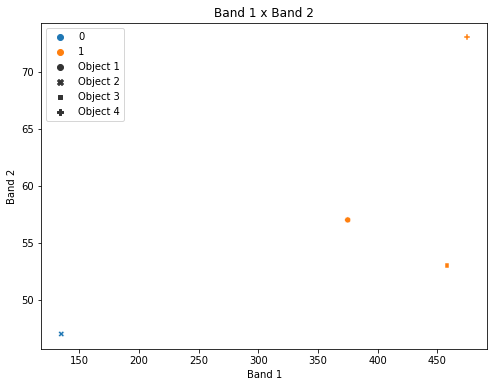

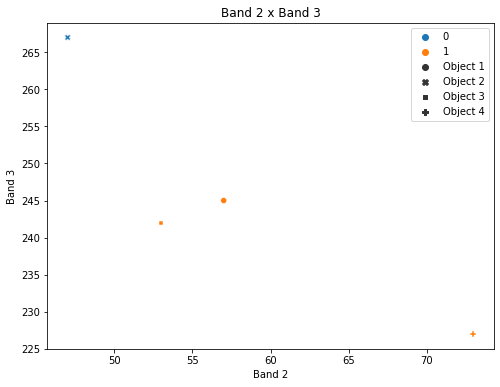

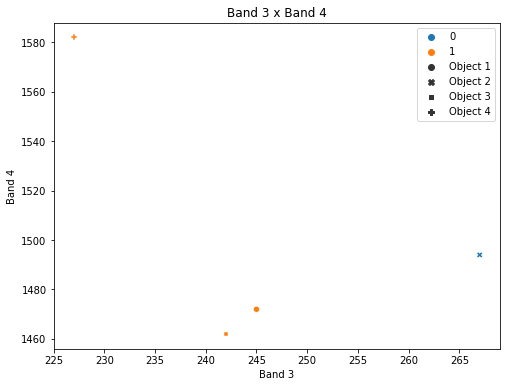

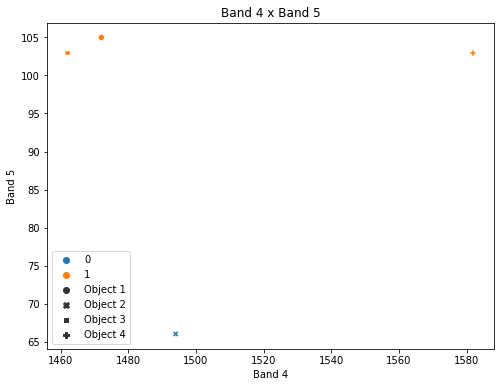

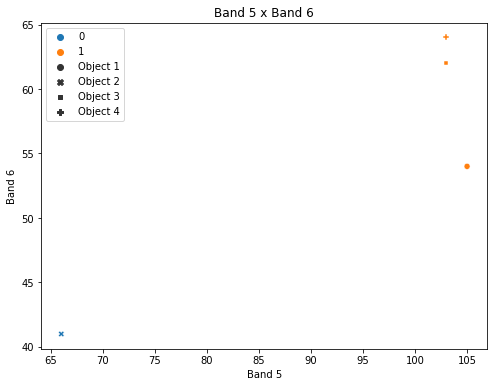

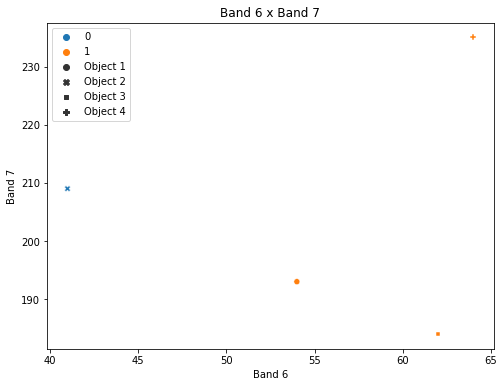

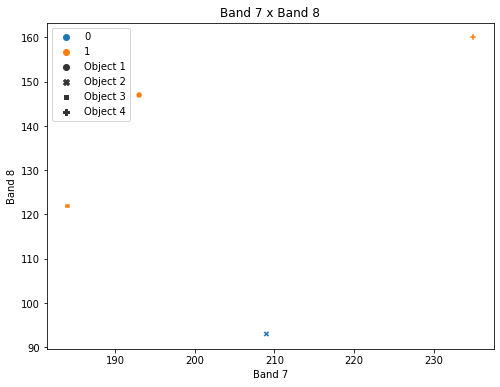

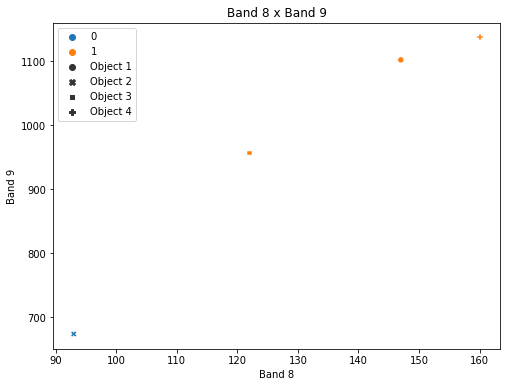

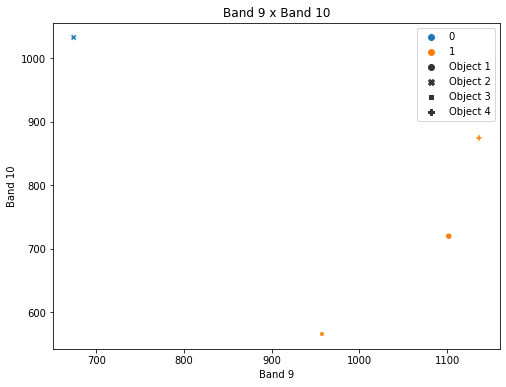

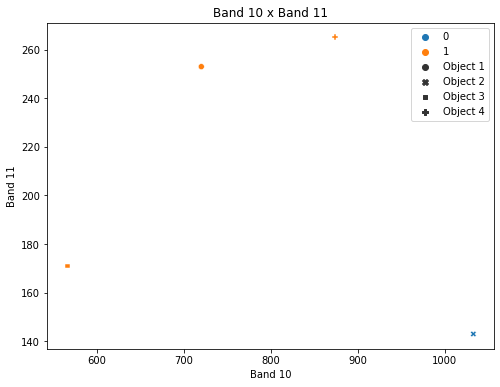

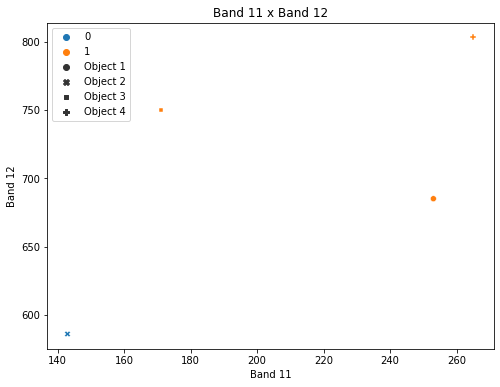

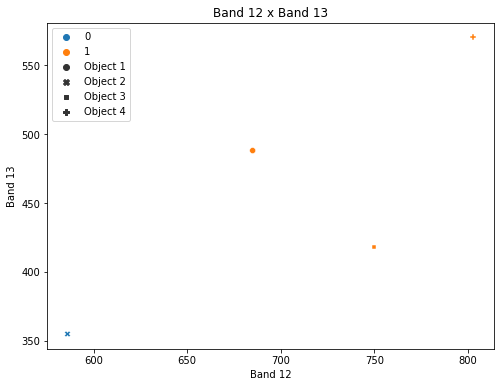

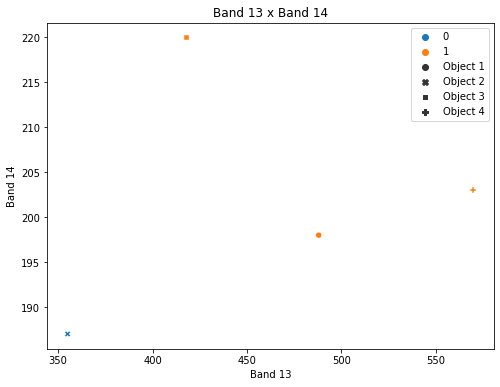

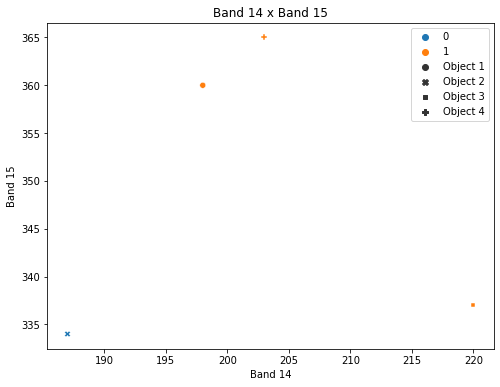

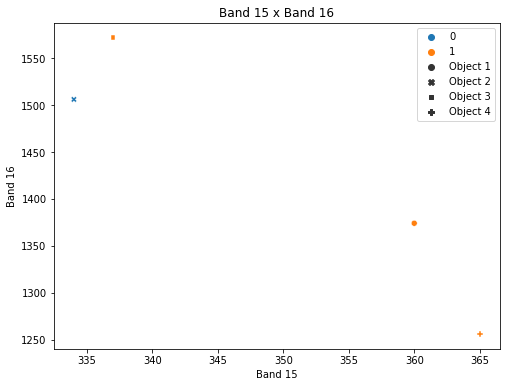

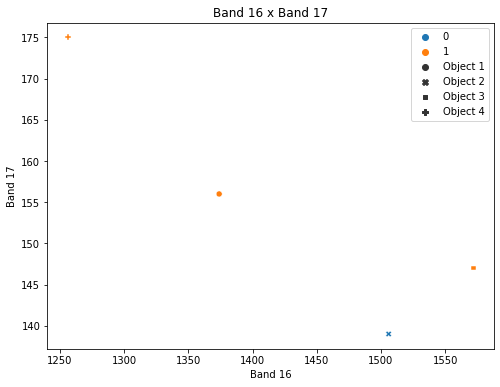

In [113]:
# data = dfs
for i in range(len(data.columns) - 1):
  plt.figure(figsize=(8,6))

  # Add title
  plt.title(f"{data.columns[i]} x {data.columns[i+1]}")
  sns.scatterplot(x=data[data.columns[i]], y=data[data.columns[i+1]], hue=y_pred, style=data.index)

In [115]:
model.get_gs_index(), model.get_ss_index()

[1 2]


({1: array([4.10340641e-04, 2.32973501e-04, 9.99675720e-01, 2.66580581e-01,
         5.71660928e-04, 3.32681421e-04, 4.90033393e-01, 4.65597757e-04,
         5.30984611e-04, 9.99622947e-01, 5.18415423e-04, 2.72506100e-04,
         3.62155804e-04, 1.94032481e-04, 4.83672807e-04, 7.90892299e-01,
         2.81340049e-04]),
  2: array([9.49586509e-01, 2.31063717e-01, 3.75111811e-01, 1.84208565e-04,
         9.48805256e-01, 9.12454990e-01, 3.42773693e-04, 4.33495089e-01,
         6.11780737e-01, 5.89341098e-04, 2.30685111e-01, 7.55260746e-01,
         2.93607484e-01, 9.98843199e-01, 9.80755680e-02, 9.98890916e-01,
         2.22680771e-01])},
 {1: array([0.62378738, 1.80308621, 0.98308675, 6.21907374, 0.32325437,
         0.93633446, 3.08946561, 0.4863856 , 0.37462527, 0.73669428,
         0.39294093, 1.36092117, 0.79545383, 2.7867919 , 0.45103248,
         1.68849186, 1.28327281]),
  2: array([ 1.45442168,  2.25971918,  9.50338312,  2.72463854, 32.99278722,
          0.71604569,  1.5484397 

dbscan/band1xband2.png
dbscan/band1xband7.png
dbscan/band2xband8.png


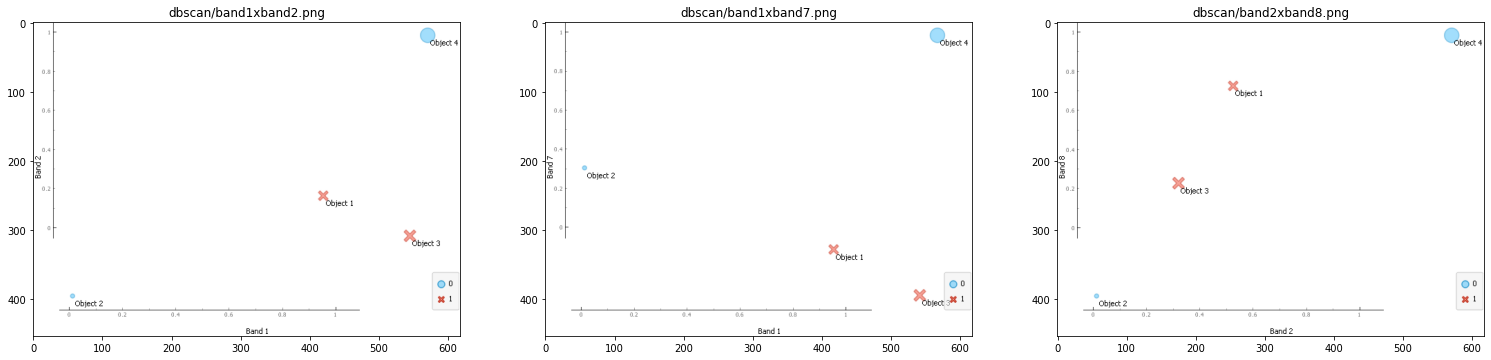

In [123]:
from PIL import Image
dir_file = "dbscan/"
l = os.listdir(dir_file)
_, ax = plt.subplots(1, len(l), figsize=(26, 8))
for file_name, i in zip(l, range(len(l))):
  print(f"{dir_file}{file_name}")
  im = Image.open(f"{dir_file}{file_name}")
  ax[i].imshow(im)
  ax[i].set_title(f"{dir_file}{file_name}")

one_class_svm/band1xband2.png
one_class_svm/band1xband7.png
one_class_svm/band2xband8.png


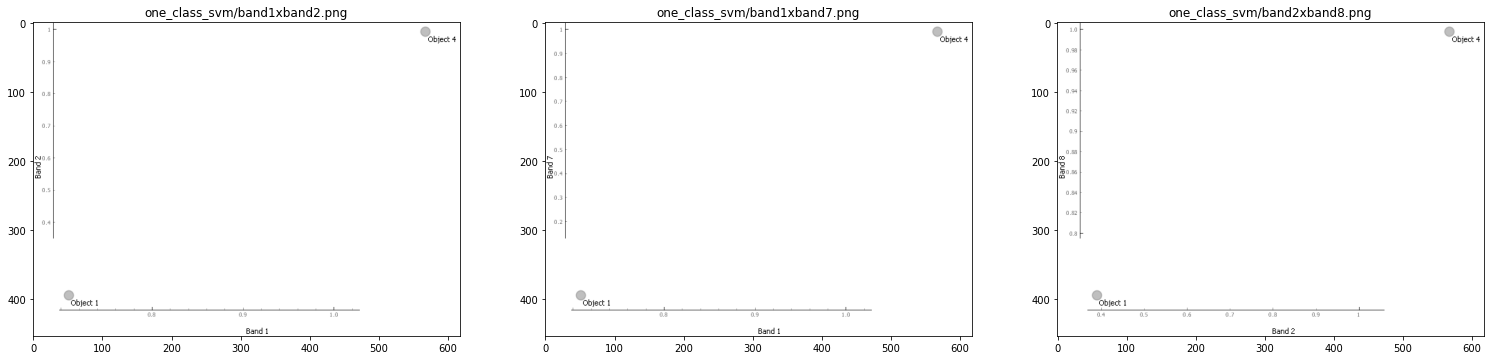

In [125]:
from PIL import Image
dir_file = "one_class_svm/"
l = os.listdir(dir_file)
_, ax = plt.subplots(1, len(l), figsize=(26, 8))
for file_name, i in zip(l, range(len(l))):
  print(f"{dir_file}{file_name}")
  im = Image.open(f"{dir_file}{file_name}")
  ax[i].imshow(im)
  ax[i].set_title(f"{dir_file}{file_name}")

kmeans/band1xband2.png
kmeans/band1xband7.png
kmeans/band2xband8.png


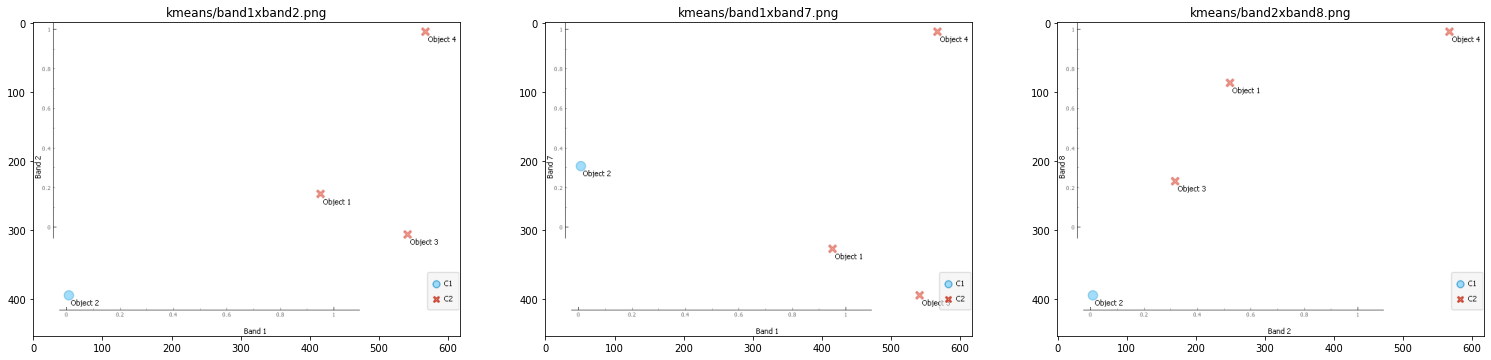

In [ ]:
from PIL import Image
dir_file = "kmeans/"
l = os.listdir(dir_file)
_, ax = plt.subplots(1, len(l), figsize=(26, 8))
for file_name, i in zip(l, range(len(l))):
  print(f"{dir_file}{file_name}")
  im = Image.open(f"{dir_file}{file_name}")
  ax[i].imshow(im)
  ax[i].set_title(f"{dir_file}{file_name}")

Em todos casos tanto quando gaussian cmeans quanto o modelos de aprendizagem usandos no orange.
  - impactou maior foi o equipamento Object 2
  - e de outro ponto tbm foi impactado, o Object 2 e Object 4 para os modelos(one_class_svm, dbscan) usados para deteccão de outliers 


Analisando graficamente podemos considerar que Object 2 está funciando com baixa intensidade enquanto que o Object 4 está muito acima.     